<a href="https://colab.research.google.com/github/rafaelbsouza/Portfolio/blob/master/Analisando_os_Dados_do_Airbnb_Vancouver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*by [Rafael Souza](https://www.linkedin.com/in/rbssouza)*

---

# Análise dos Dados do Airbnb - *Vancouver*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="20%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>


**Neste *notebook*, iremos analisar os dados referentes à cidade de Vancouver - Canada, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados disponibilizados neste notebook, foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para a análise exploratória inicial, usaremos apenas o arquivo abaixo:

* **listings.csv** - Summary information and metrics for listings in Vancouver (good for visualisations).

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/bc/vancouver/2020-05-11/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [0]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10080,D1 - Million Dollar View 2 BR,30899,Rami,NaN,Downtown,49.28772,-123.12110,Entire home/apt,151,90,16,2017-02-26,0.15,49,347
1,13188,Garden level studio in ideal loc.,51466,Family Guns,NaN,Riley Park,49.24577,-123.10516,Entire home/apt,120,2,242,2020-04-30,1.94,1,211
2,13357,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,52118,Liliana,NaN,Downtown Eastside,49.27955,-123.10546,Entire home/apt,161,30,58,2020-03-24,0.47,3,335
3,13358,Monthly (or Longer ) Designer One Bedroom Down...,52116,Lynn,NaN,West End,49.28209,-123.12515,Entire home/apt,70,30,427,2019-08-04,3.54,1,57
4,13490,Vancouver's best kept secret,52467,Iris,NaN,Kensington-Cedar Cottage,49.25550,-123.06696,Entire home/apt,145,30,85,2020-04-18,0.78,1,326


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prosseguiremos a nossa análise, identificando a quantidade de entradas que o nosso conjunto de dados possuí e verificaremos os tipos de cada coluna.

O conjunto de dados que baixamos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é a versão sumarizada dos dados disponibilizados pelo Airbnb. No site supracitado é possível encontrar a versão completa de todas as entradas e variáveis.

In [0]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print ("Variáveis:\t {}\n".format(df.shape[1]))

# Identificar as variáveis (colunas) do nosso dataset
display(df.dtypes)

Entradas:	5806
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante avaliar desde o inicio se esses valores nulos são significativos se comparado com o total de entradas que temos disponível.

Neste primeiro tratamento, conseguimos identificar as seguintes situações:

* A variável **neighbourhood_group** em todo nosso *dataset* possui 100% dos seus valores não informados/faltantes.
* As variáveis **reviews_per_month** *(quantidade de reviews por mês)* e **last_review** *(data do último review)* possuem valores nulos em aproximadamente 15% das linhas.
* A variavel **name** *(nome da propriedade anunciada)* não é preenchida em menos de 0,1% dos casos.

In [0]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.149501
last_review                       0.149501
name                              0.000172
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 
Para identificar a distribuição das variáveis, usaremos um gráfico de **Histograma** (distribuição de frequências).

Esse tipo de gráfico vai nos ajudar a identificar dados **atípico** ou **inconsistentes**.

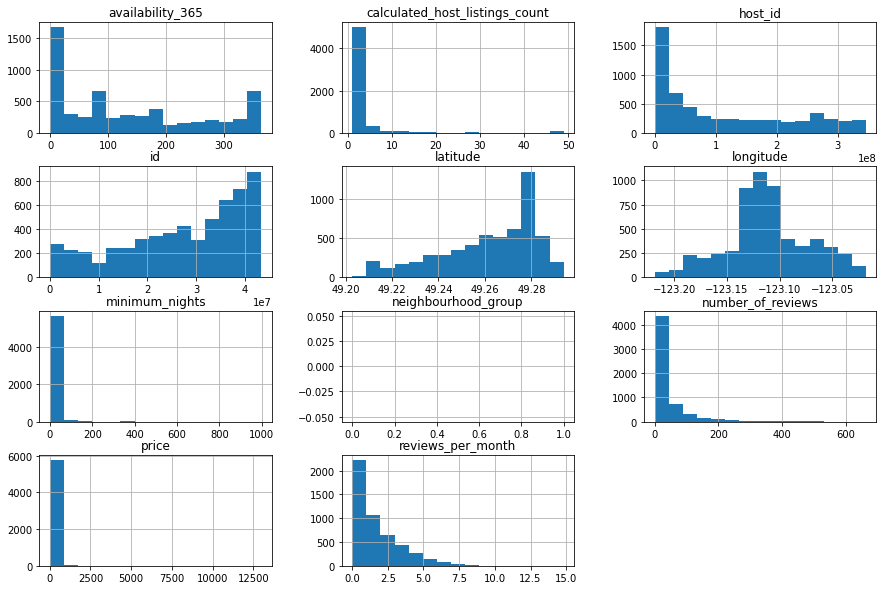

In [0]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q5. Há Outliers Presentes?**

Olhando os histogramas acima, conseguimos facilmente perceber que os gráficos que representam o **Preço** (price) e a **Quantidade mínima de noites para reservar** (minimum_nights) não nos contam nada. Isso acontece por que o conjunto de dados que estamos trabalhando, apresentam **valores discrepantes** (*`OUTLIERS`*) e não seguem uma distribuição uniforme, distorcendo toda a representação gráfica.

Para a confirmação, há duas maneiras rápidas que nos auxiliam na detecção de outliers. Sendo:
* Resumo estatístico por meio do método "***describe()***"
* Criar um gráfico de ***boxplots*** para a variável que estamos buscando essa confirmação.

In [29]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
count,5806.000000,5806.00000,4938.000000,5806.000000,5806.000000
mean,174.295040,14.15794,1.724563,3.598691,137.496900
std,266.424203,34.78132,1.667647,7.162984,126.036135
min,13.000000,1.00000,0.010000,1.000000,0.000000
25%,85.000000,1.00000,0.430000,1.000000,6.250000
50%,125.000000,3.00000,1.170000,1.000000,102.000000
75%,200.000000,30.00000,2.560000,3.000000,244.000000
max,12999.000000,998.00000,14.820000,49.000000,365.000000


Olhando o resumo estatístico acima, podemos observar algumas particularidades: 

* 75% dos anúncios tem o preço de $200,00 e estadia mínima de 30 dias.

* O maior preço registrado foi de $12999,00
* A quantidade mínima de noites (minimum_nights) está acima de 365 dias no ano.

**Esses valores discrepantes são considerados Outliers.**

#### Boxplot para minimum_nights

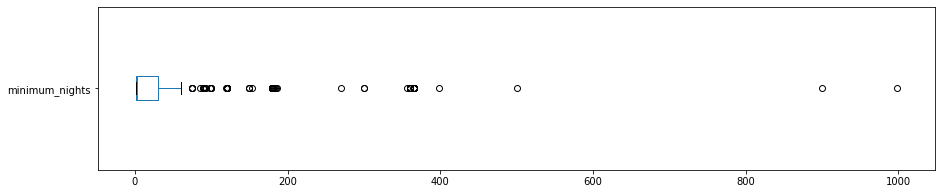

minimum_nights: valores acima de 30:
349 entradas
6.0110%


In [14]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

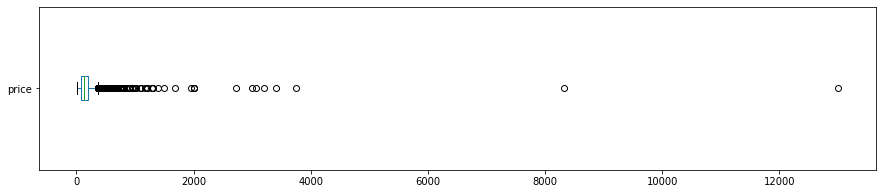


valores acima de U$500,00
164 entradas
2.8247%


In [19]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 500 para price
print("\nvalores acima de U$500,00")
print("{} entradas".format(len(df[df.price > 500])))
print("{:.4f}%".format((len(df[df.price > 500]) / df.shape[0])*100))

Olhando os gráficos acima, identificamos que existe muita distorção dos dados que estamos analisando. Essa distorção faz com que nossa análise seja menos acertiva, então, abaixo iremos eliminar esses dados incoerentes e novamente apresentar os gráficos que nos dará uma nova percepção. 

#### Histogramas sem *outliers*

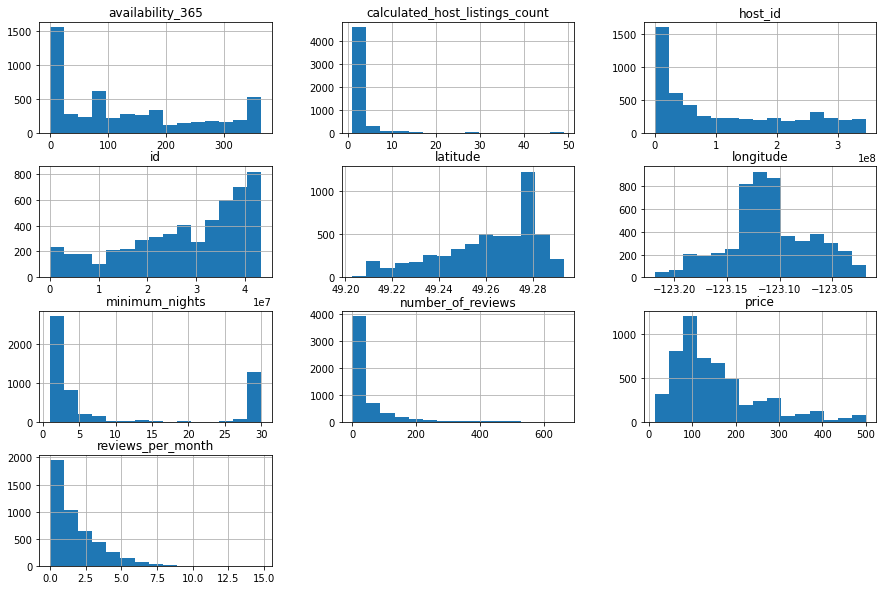

In [20]:
# remover os *outliers* e copiar o resultado em uma novo conjunto de dados (DataFrame)
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover *neighbourhood_group*, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Analisando novamente os dados depois de limpo, podemos ver claramente que o preço por noite varia entre 50,00 e $250,00. 
Também podemos verificar que existem dois tipos distintos de **locador**: Os que querem alugar o imóvel esporádicamente e os que querem alugar por longos períodos. 

### **Q4. Qual a média dos preços de aluguel?**

Quando procuramos por um imóvel, sempre é bom saber a média de preços praticada naquela região. Com isso em mente, abaixo podemos observar que a média de preço do aluguel na cidade de Vancouver é de aproximadamente U$152,00 por diária e a permanencia é de aproximadamente 9 dias.

In [27]:
# ver a média da coluna `price``
print("\nA média de Preços é de:")
df_clean.price.mean()



A média de Preços é de:


152.08075471698112

In [28]:
# ver a média da coluna `minimum_nights``
print("\nA média de dias por anúncio é de:")
df_clean.minimum_nights.mean()


A média de dias por anúncio é de:


9.403018867924528

### **Q5. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [30]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.099123,-0.069323,-0.013262,-0.131579,0.028443
minimum_nights,-0.099123,1.000000,-0.143208,-0.280977,0.217757,0.166362
number_of_reviews,-0.069323,-0.143208,1.000000,0.672699,-0.145426,0.060570
reviews_per_month,-0.013262,-0.280977,0.672699,1.000000,-0.162736,0.030275
calculated_host_listings_count,-0.131579,0.217757,-0.145426,-0.162736,1.000000,0.097381
availability_365,0.028443,0.166362,0.060570,0.030275,0.097381,1.000000


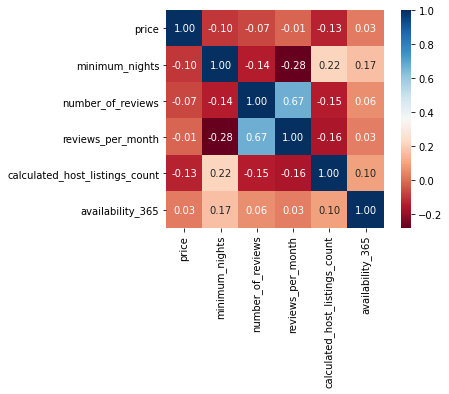

In [31]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Para responder essa pergunta iremos utilizar a variavel *room_type* disponível no nosso dataset e utilizando do método ***value_counts()***, é possível somar todas as entradas e identificarmos de forma fácil o que mais se oferta nos anúncios da Airbnb. Veja abaixo:


In [32]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    3812
Private room       1432
Shared room          49
Hotel room            7
Name: room_type, dtype: int64

In [33]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df.shape[0]

Entire home/apt    0.656562
Private room       0.246641
Shared room        0.008440
Hotel room         0.001206
Name: room_type, dtype: float64

65% dos anunciantes alugam todo o espaço de suas casas/apartamentos. 

### **Q7. Qual a localidade mais cara da cidade de Vancouver?**

Uma maneira de se verificar uma variável em função da outra é usando **groupby()**. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [40]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Downtown              185.286190
Downtown Eastside     182.423611
Kitsilano             171.333333
Mount Pleasant        163.372093
West End              158.090361
Dunbar Southlands     155.662252
South Cambie          154.150000
West Point Grey       153.042105
Fairview              145.942857
Grandview-Woodland    143.003802
Name: price, dtype: float64

Acima, vemos os 10 bairros mais caros para se alugar em Vancouver por dia. 

Como os dados que estamos analisando nos é fornecido as informações de longitude e latitude dos imóveis cadastrados, abaixo iremos plotar um mapa para cada ponto da Cidade de Vancouver. 

Iremos considerar **x=longitude** e **y=latitude**:


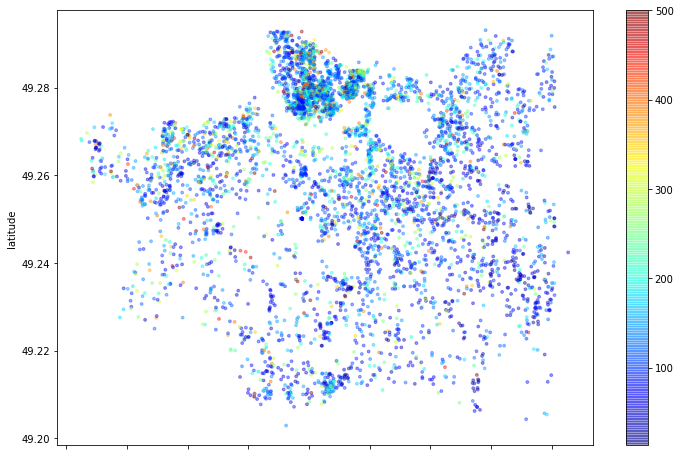

In [42]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
        cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Com os dados sumarizados disponibilizados pela [Inside Airbnb](http://insideairbnb.com/get-the-data.html), realizamos análises de forma superficial a fim de entender melhor como é o mercado de locação de imóveis na cidade de Vancouver. 

Conseguimos identificar que a média de preço nos bairros são bem parecidas (tirando algumas excessões que são consideradas Outliers), e que a maior concentração de anuncio ocorre no Norte da cidade e próximo ao aeroporto.

Também conseguimos identificar dois tipos de anunciantes, os que estão alugando por temporada e os que estão alugando esporadicamente. 

Como Vancouver é uma cidade muito procurada por estudantes, isso explica o grande número de anúncios onde a permanência mínima é de 30 dias. 

Lembrando que essa análise exploratória incial se baseou nos dados resumidos. Recomenda-se que seja usado, em uma próxima análise, os dados completos onde podemos analisar um conjunto maior de variáveis e tirar uma gama maior de insights. 
